In [4]:
from scipy.optimize import minimize
import numpy as np


def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            #print('pos1:  ', pos1)
            #print('pos2:  ', pos2)
            dist = np.linalg.norm(pos1-pos2)
            #print(i,j, dist)
            E += LJ(dist)
    return E

def init_population(population_size, N_atom):
    cluster = []
    for i in range(population_size):
        cluster.append(init_pos(N_atom))
    return np.array(cluster)

def local_optimize(cluster):
    fitness = []
    for i, cluster0 in enumerate(cluster):
        res = minimize(total_energy, cluster0, method='CG', tol=1e-3) 
        cluster0 = res.x
        fitness.append(res.fun)
    return cluster, np.array(fitness)
        
def ranking(fitness):
    return np.argsort(fitness)

def mutation(cluster, rank, kT=1):
    
    id = int(len(rank)*np.random.random()/2)
    cluster0 = cluster[id]
    return cluster0 + kT*np.random.random_sample((len(cluster0),))

def crossover(cluster, rank):
    id1 = int(len(rank)*np.random.random()/2)
    while True:
        id2 = int(len(rank)*np.random.random()/2)
        if id2 != id1:
            break
    frac = np.random.random()
    return cluster[id1]*frac + cluster[id2]*(1-frac)


def GA(generation_num=10, population_num=10, atom_num=10):
    for i in range(generation_num):
        if i == 0:
            cluster = init_population(population_num, atom_num)
            
        cluster, fitness = local_optimize(cluster)
        #print(fitness)
        print('best fitness in generation ', i, ':  ', min(fitness))
        
        rank = ranking(fitness)
        new_cluster = []
        for j in range(population_num):
            if j < int(0.7*population_num):
                new_cluster.append(crossover(cluster, rank))
            else:
                new_cluster.append(mutation(cluster, rank))
        cluster = new_cluster
        
GA(atom_num=2)

best fitness in generation  0 :   -1.0
best fitness in generation  1 :   -1.0
best fitness in generation  2 :   -0.9999999999997575
best fitness in generation  3 :   -0.9999999999997468
best fitness in generation  4 :   -0.9999999999999181
best fitness in generation  5 :   -0.9999999999999418
best fitness in generation  6 :   -0.9999999999997227
best fitness in generation  7 :   -0.9999999999998181
best fitness in generation  8 :   -0.9999999999953259
best fitness in generation  9 :   -0.9999999999988322


In [1]:
from sklearn.datasets import load_iris
from collections import OrderedDict
import pandas as pd

dataset = load_iris()
X = dataset.data
Y = dataset.target
print(X)
print(Y)

Iris_data = OrderedDict({'Sepal Length ': X[:,0],
             'Sepal Width': X[:,1],
             'Petal Length': X[:,2],
             'Petal Width': X[:,3],
             'Label': Y})

df = pd.DataFrame(Iris_data)
print(df)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

,Sepal Length,Sepal Width,Petal Length,Petal Width,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


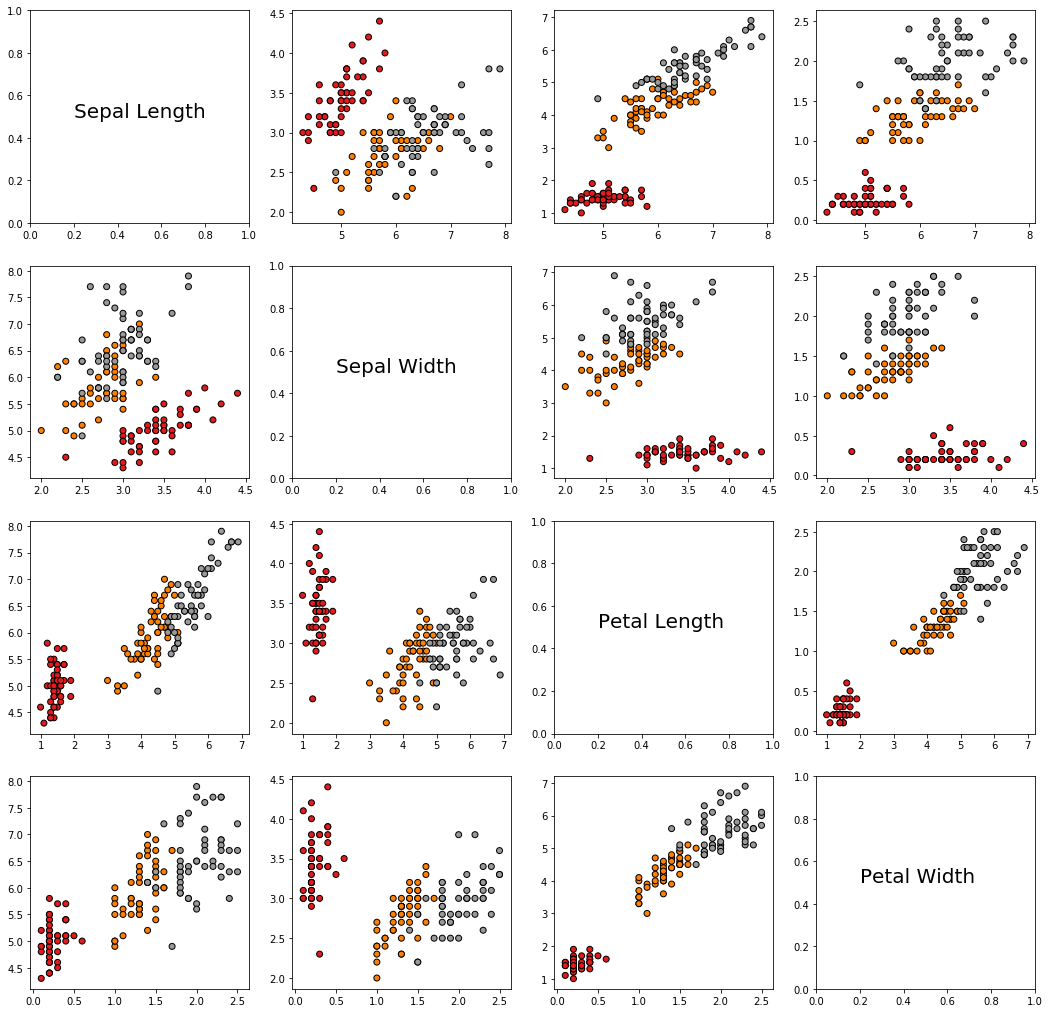

In [3]:
import matplotlib.pyplot as plt

label = ['Sepal Length','Sepal Width','Petal Length','Petal Width']


fig, axarr = plt.subplots(4, 4)
fig.set_size_inches(18, 18)

for i in range(4):
    x1 = X[:,i]
    for j in range(4):
        x2 = X[:,j]
        if i == j:
            axarr[i,j].text(0.2, 0.5, label[i],fontsize=20)
        else:
            axarr[i,j].scatter(x1, x2, c=Y, cmap=plt.cm.Set1,edgecolor='k')
            
plt.show()

In [5]:
def Iris_classifier(x):

    # a simple calssifier from our eyes
    label = None

    if x[3]>0 and x[3]<0.8 and x[2]>0 and x[2]<2:
        label = 0 #'setosa'
    elif x[3]>0.8 and x[3]<1.6 and x[2]>3 and x[2]<5:
        label = 1 #'versicolor'
    else:
        label = 2 #'virginica'

    return label

# Let's try to calculate the success rate of this classfier
count = 0
for xx, yy in zip(X, Y):
    if Iris_classifier(xx)== yy:
        count += 1
        
print('The overall success rate is: ', count/len(X)*100 ,'%')

The overall success rate is:  96.0 %


In [6]:
from sklearn.cross_validation import train_test_split
Xd_train, Xd_test, Y_train, Y_test = train_test_split(X, Y)

def success_ratio(X_test, Y_test):
    count = 0
    for xx, yy in zip(X_test, Y_test):
        if Iris_classifier(xx) == yy:
            count += 1
    return float(count/len(X_test))

print(success_ratio(Xd_test, Y_test))

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [7]:
from sklearn.model_selection import train_test_split
Xd_train, Xd_test, Y_train, Y_test = train_test_split(X, Y)

def success_ratio(X_test, Y_test):
    count = 0
    for xx, yy in zip(X_test, Y_test):
        if Iris_classifier(xx) == yy:
            count += 1
    return float(count/len(X_test))

print(success_ratio(Xd_test, Y_test))

0.9473684210526315


In [8]:
import numpy as np
from collections import OrderedDict
import pandas as pd

X_d = np.array( X>X.mean(), dtype='int')


Iris_data_d = OrderedDict({'Sepal Length ': X_d[:,0],
             'Sepal Width': X_d[:,1],
             'Petal Length': X_d[:,2],
             'Petal Width': X_d[:,3],
             'Label': Y})

df = pd.DataFrame(Iris_data_d)
df



,Sepal Length,Sepal Width,Petal Length,Petal Width,Label
0,1,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,1,0,0,0
5,1,1,0,0,0
6,1,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,1,0,0,0,0


(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

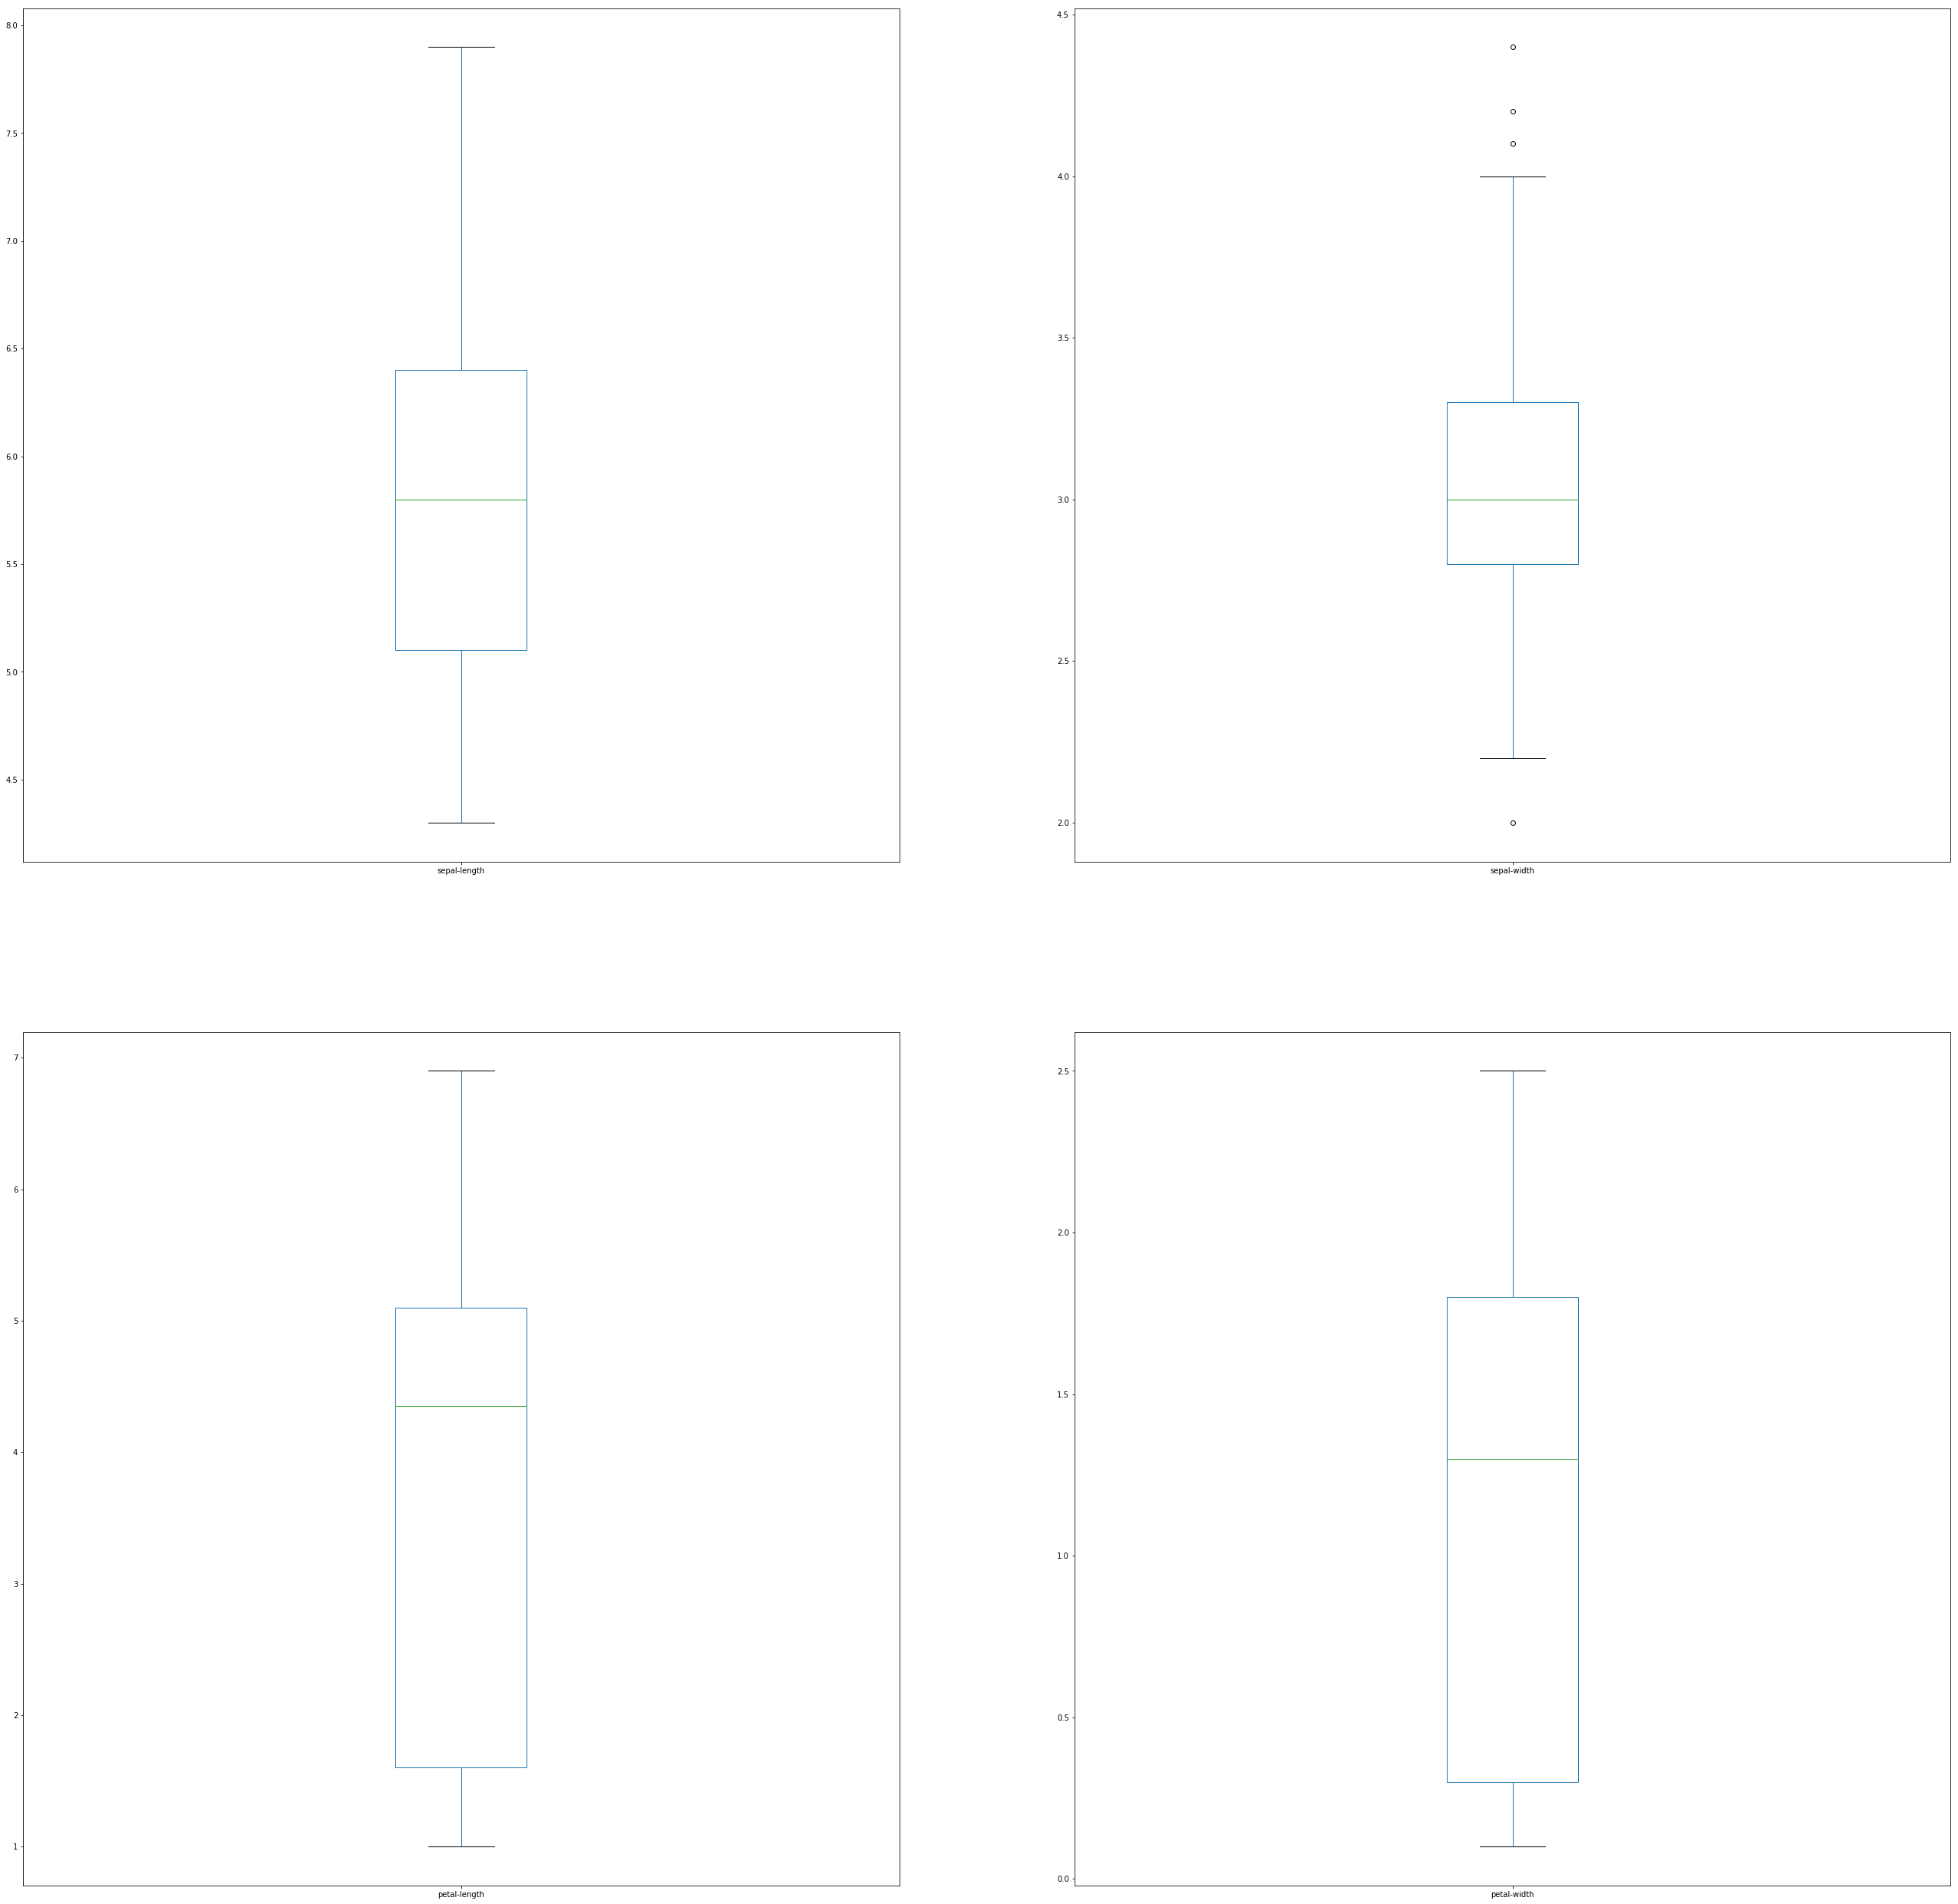

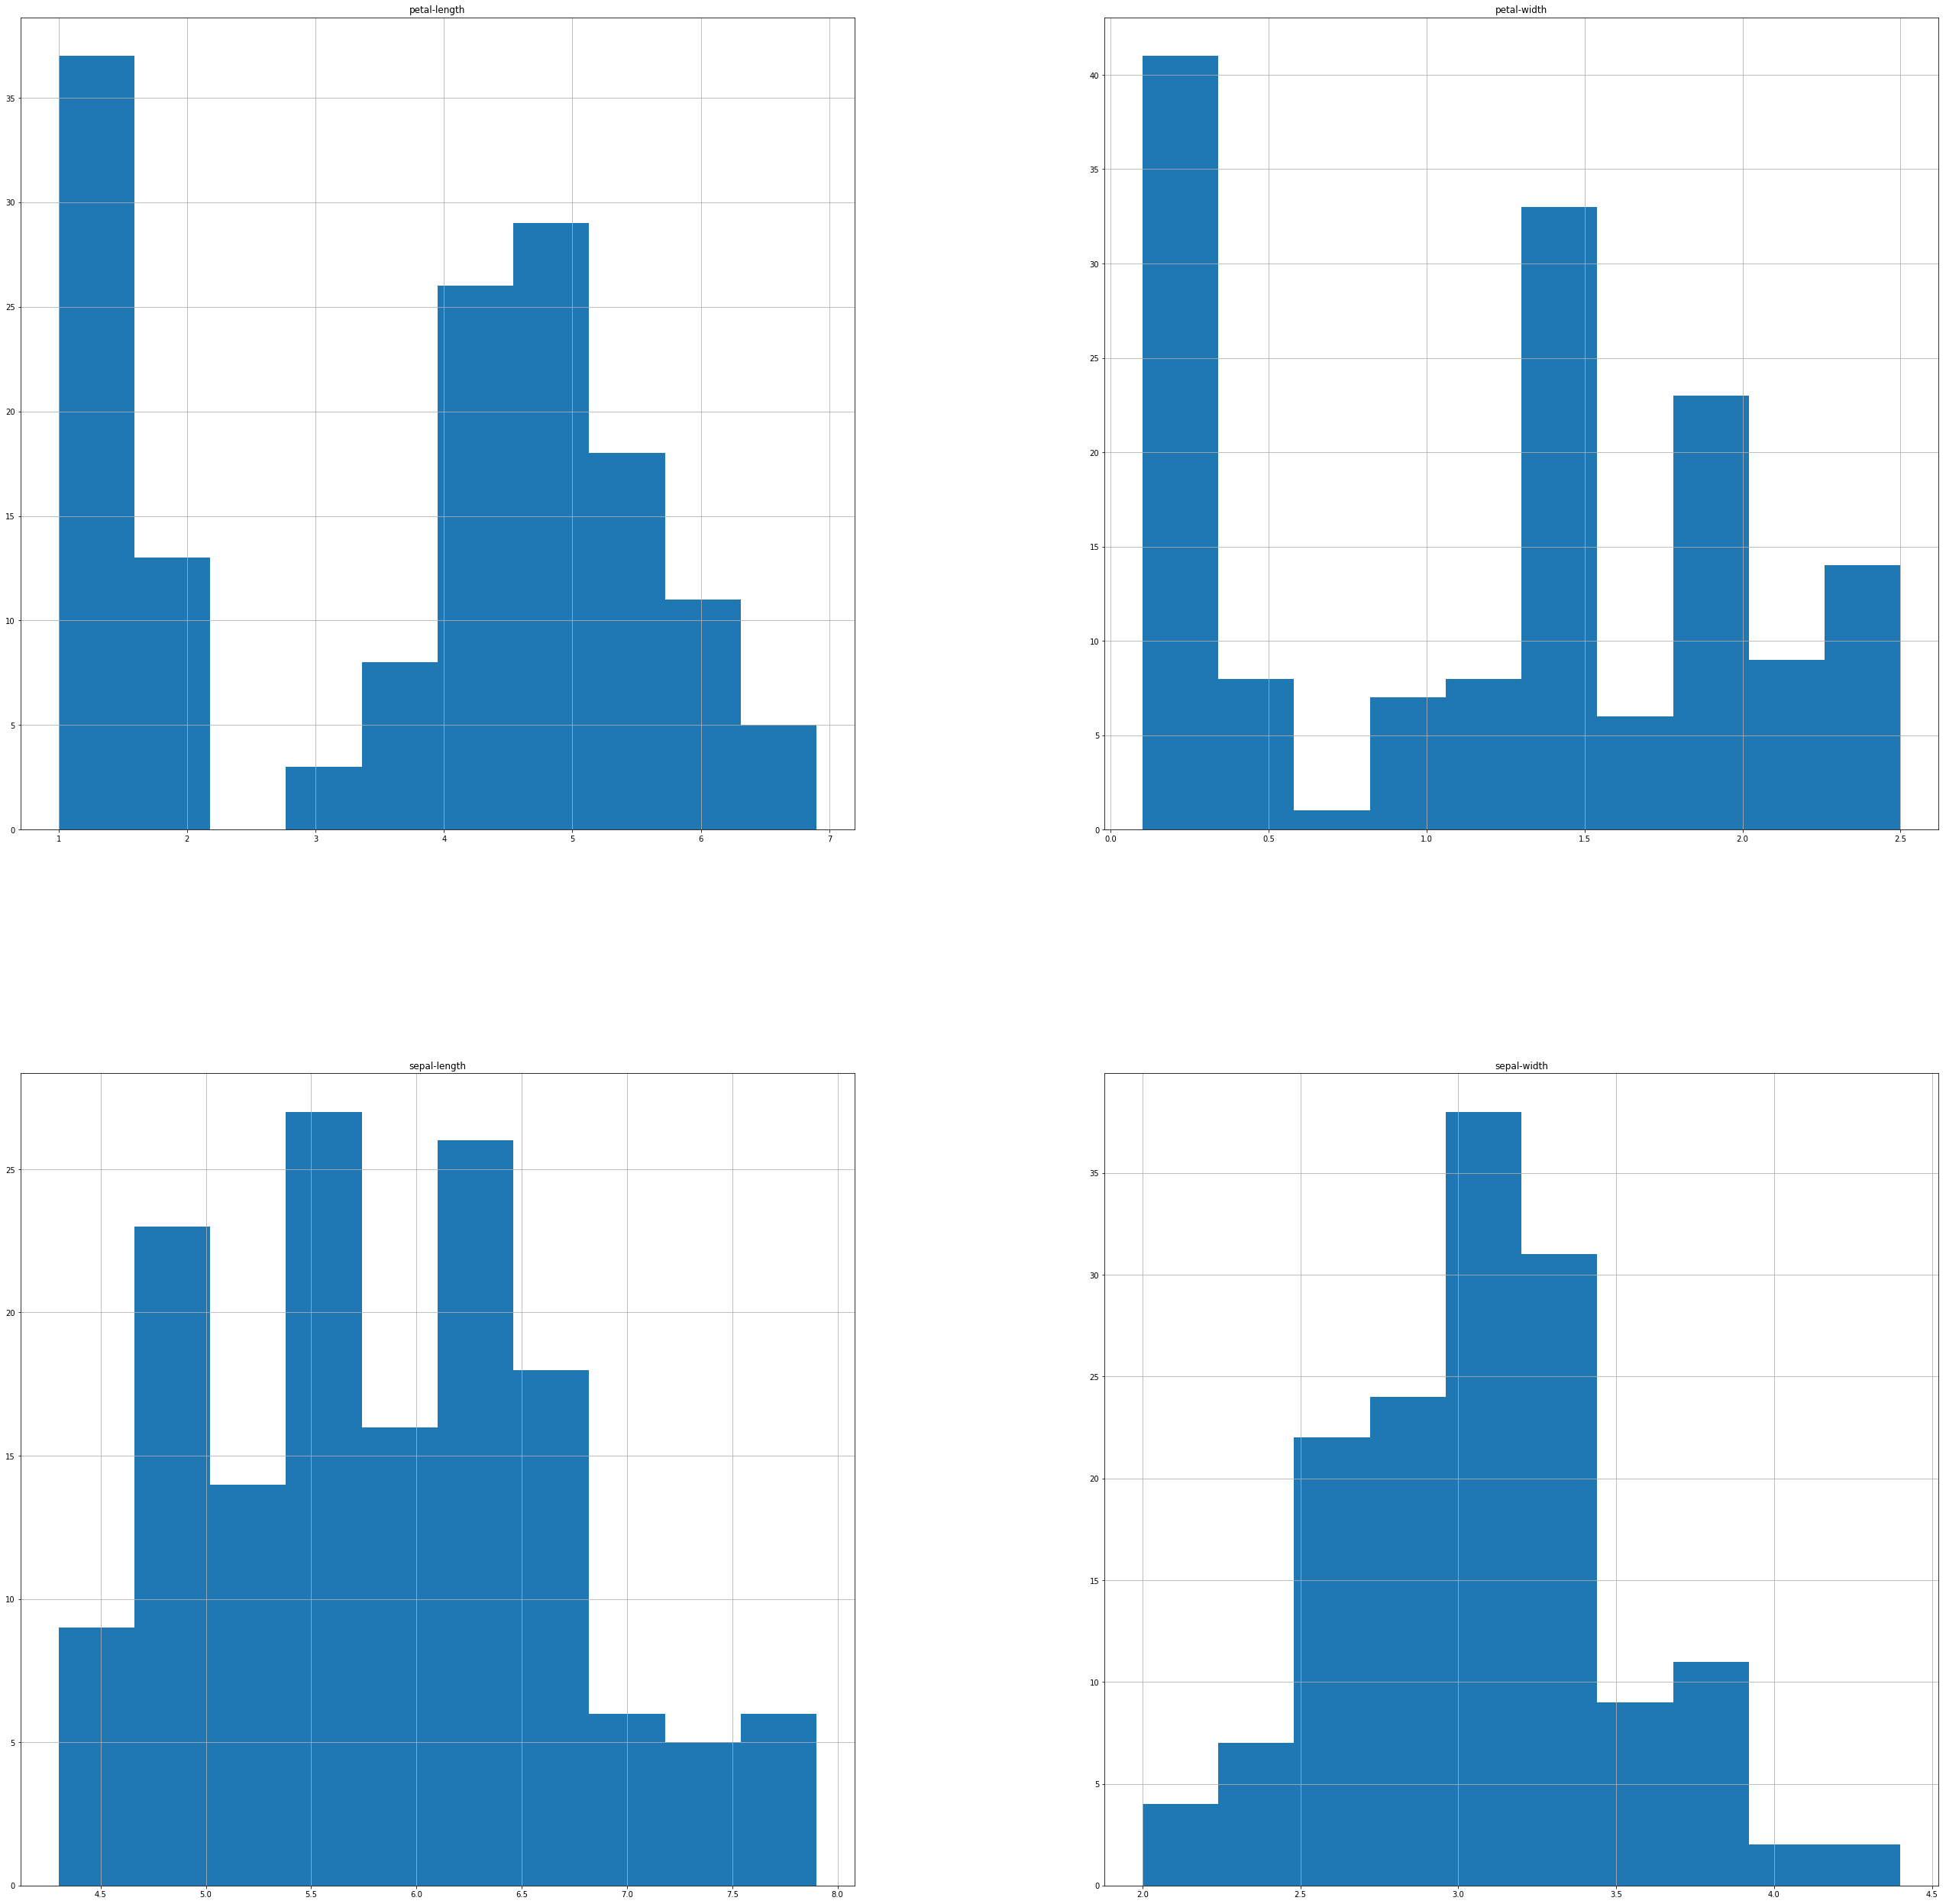

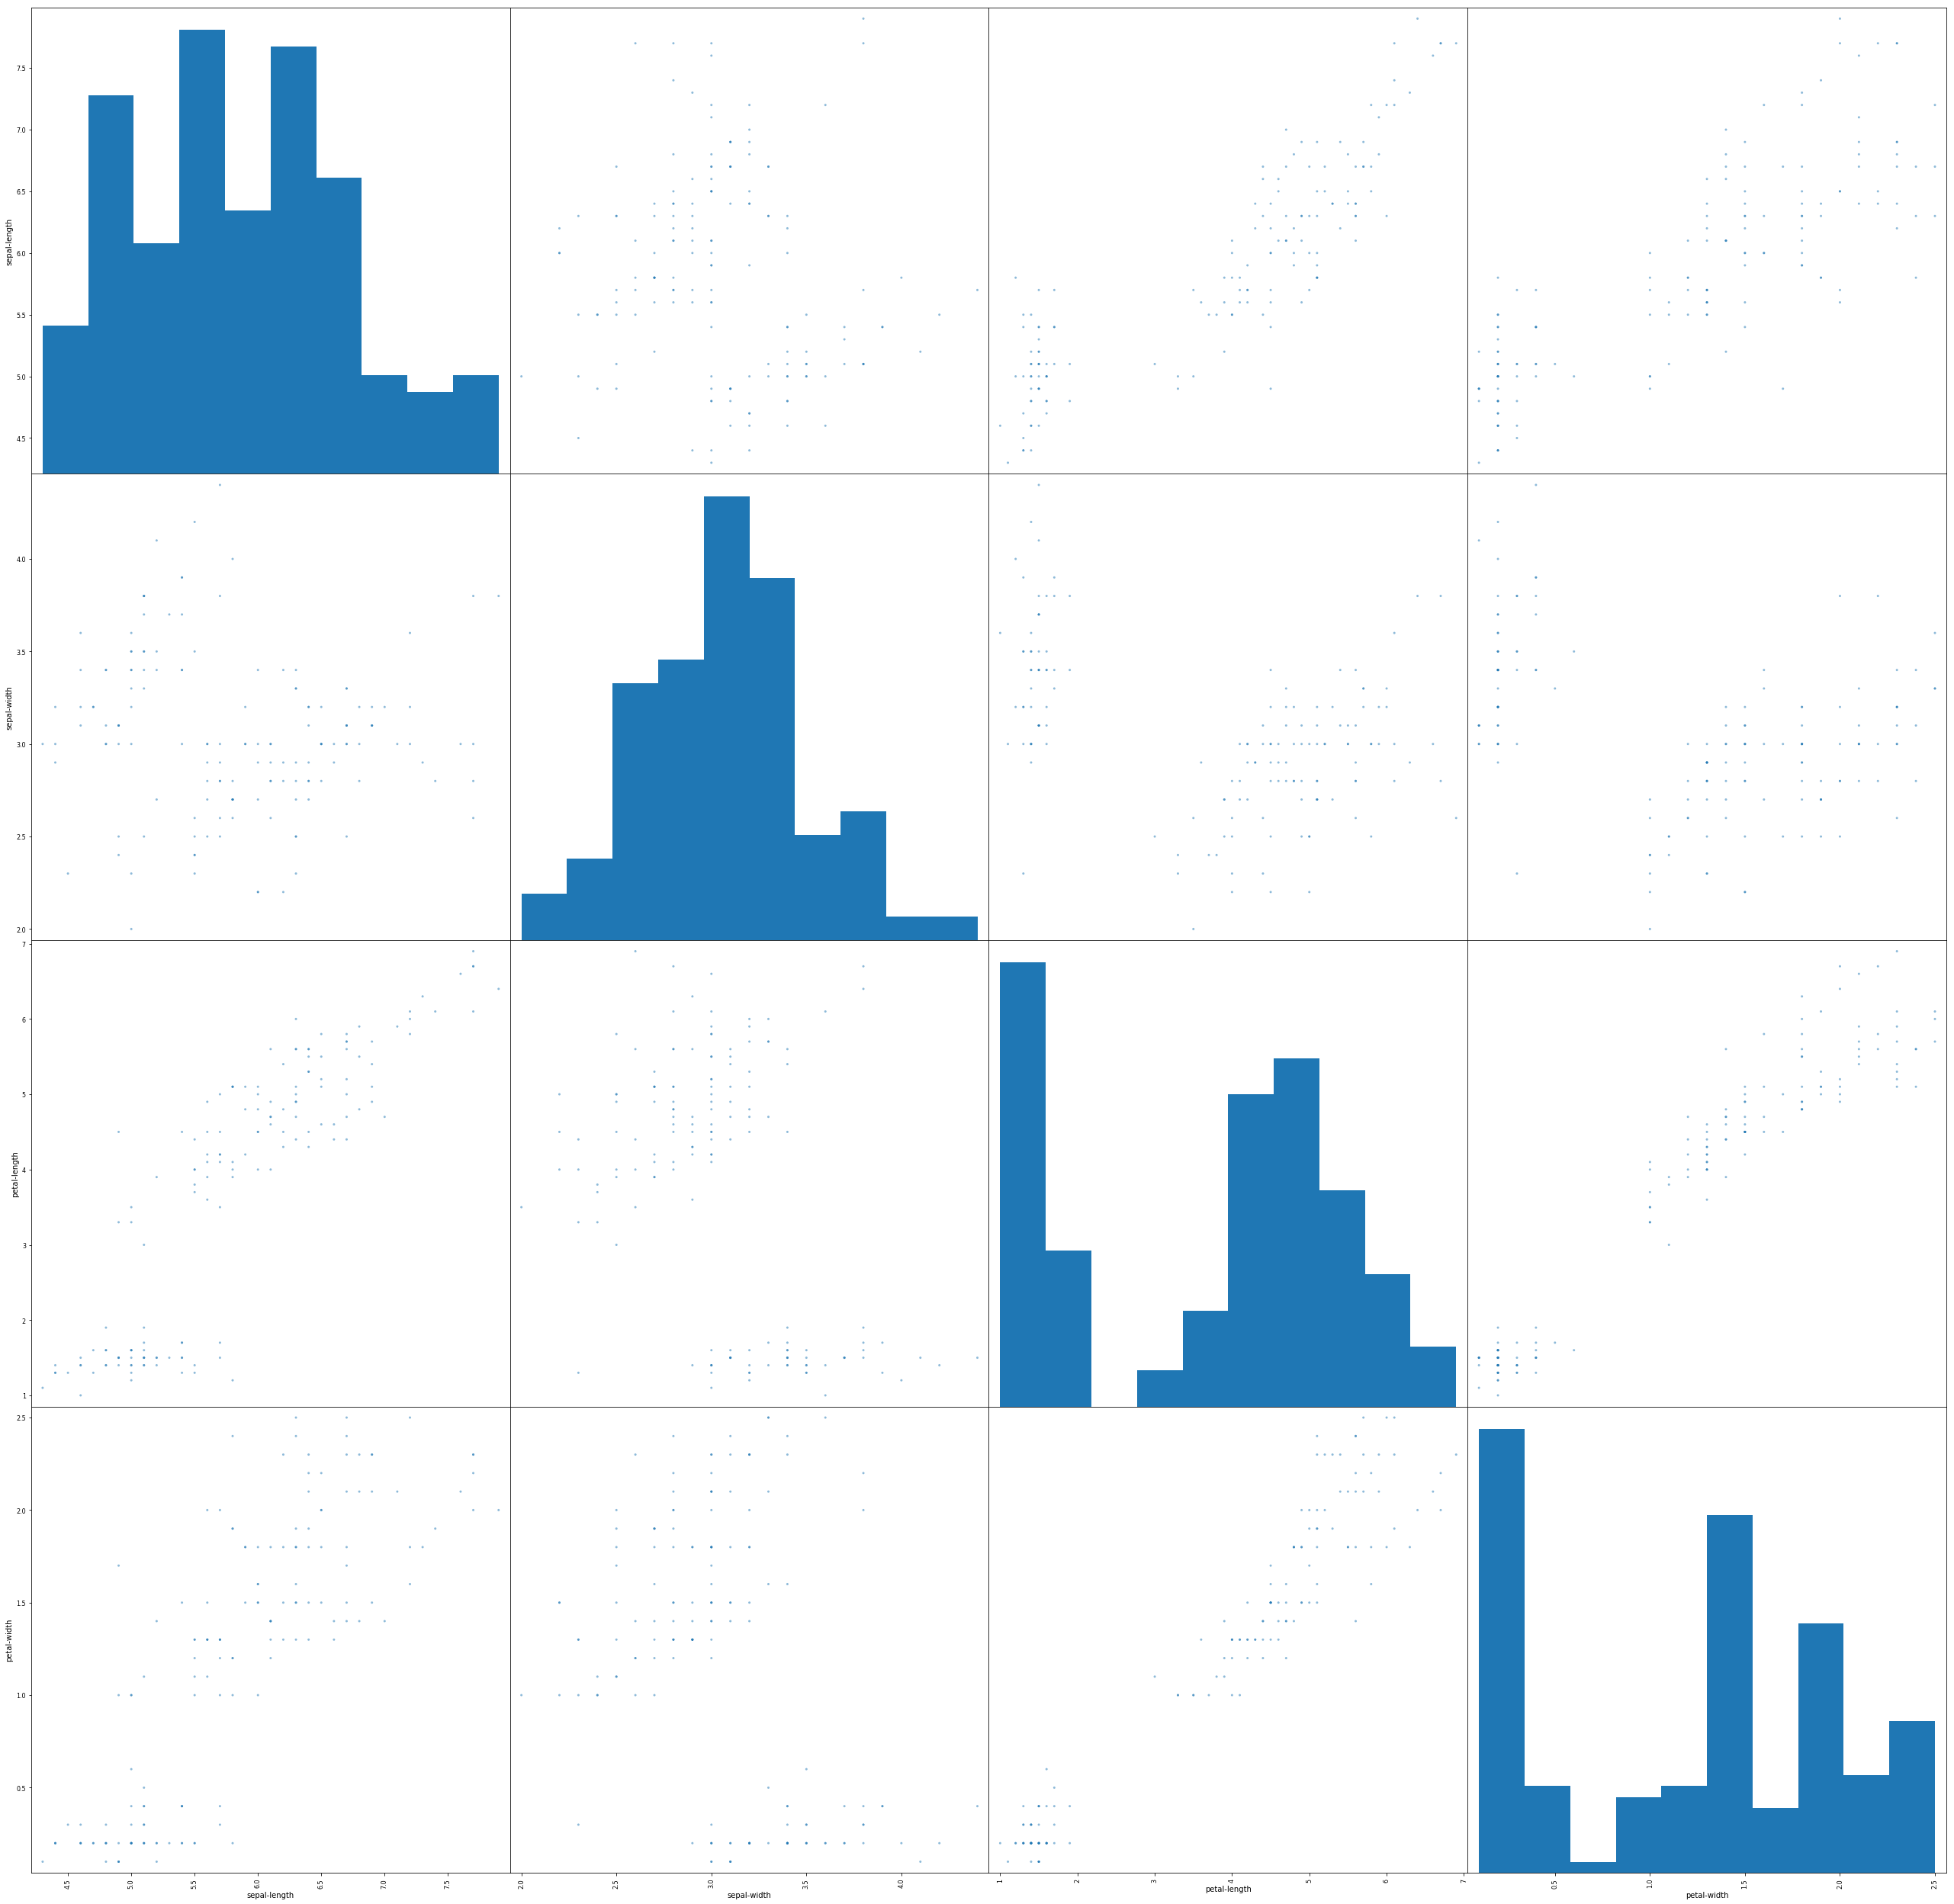

/Users/user/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/user/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/user/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/user/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/user/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


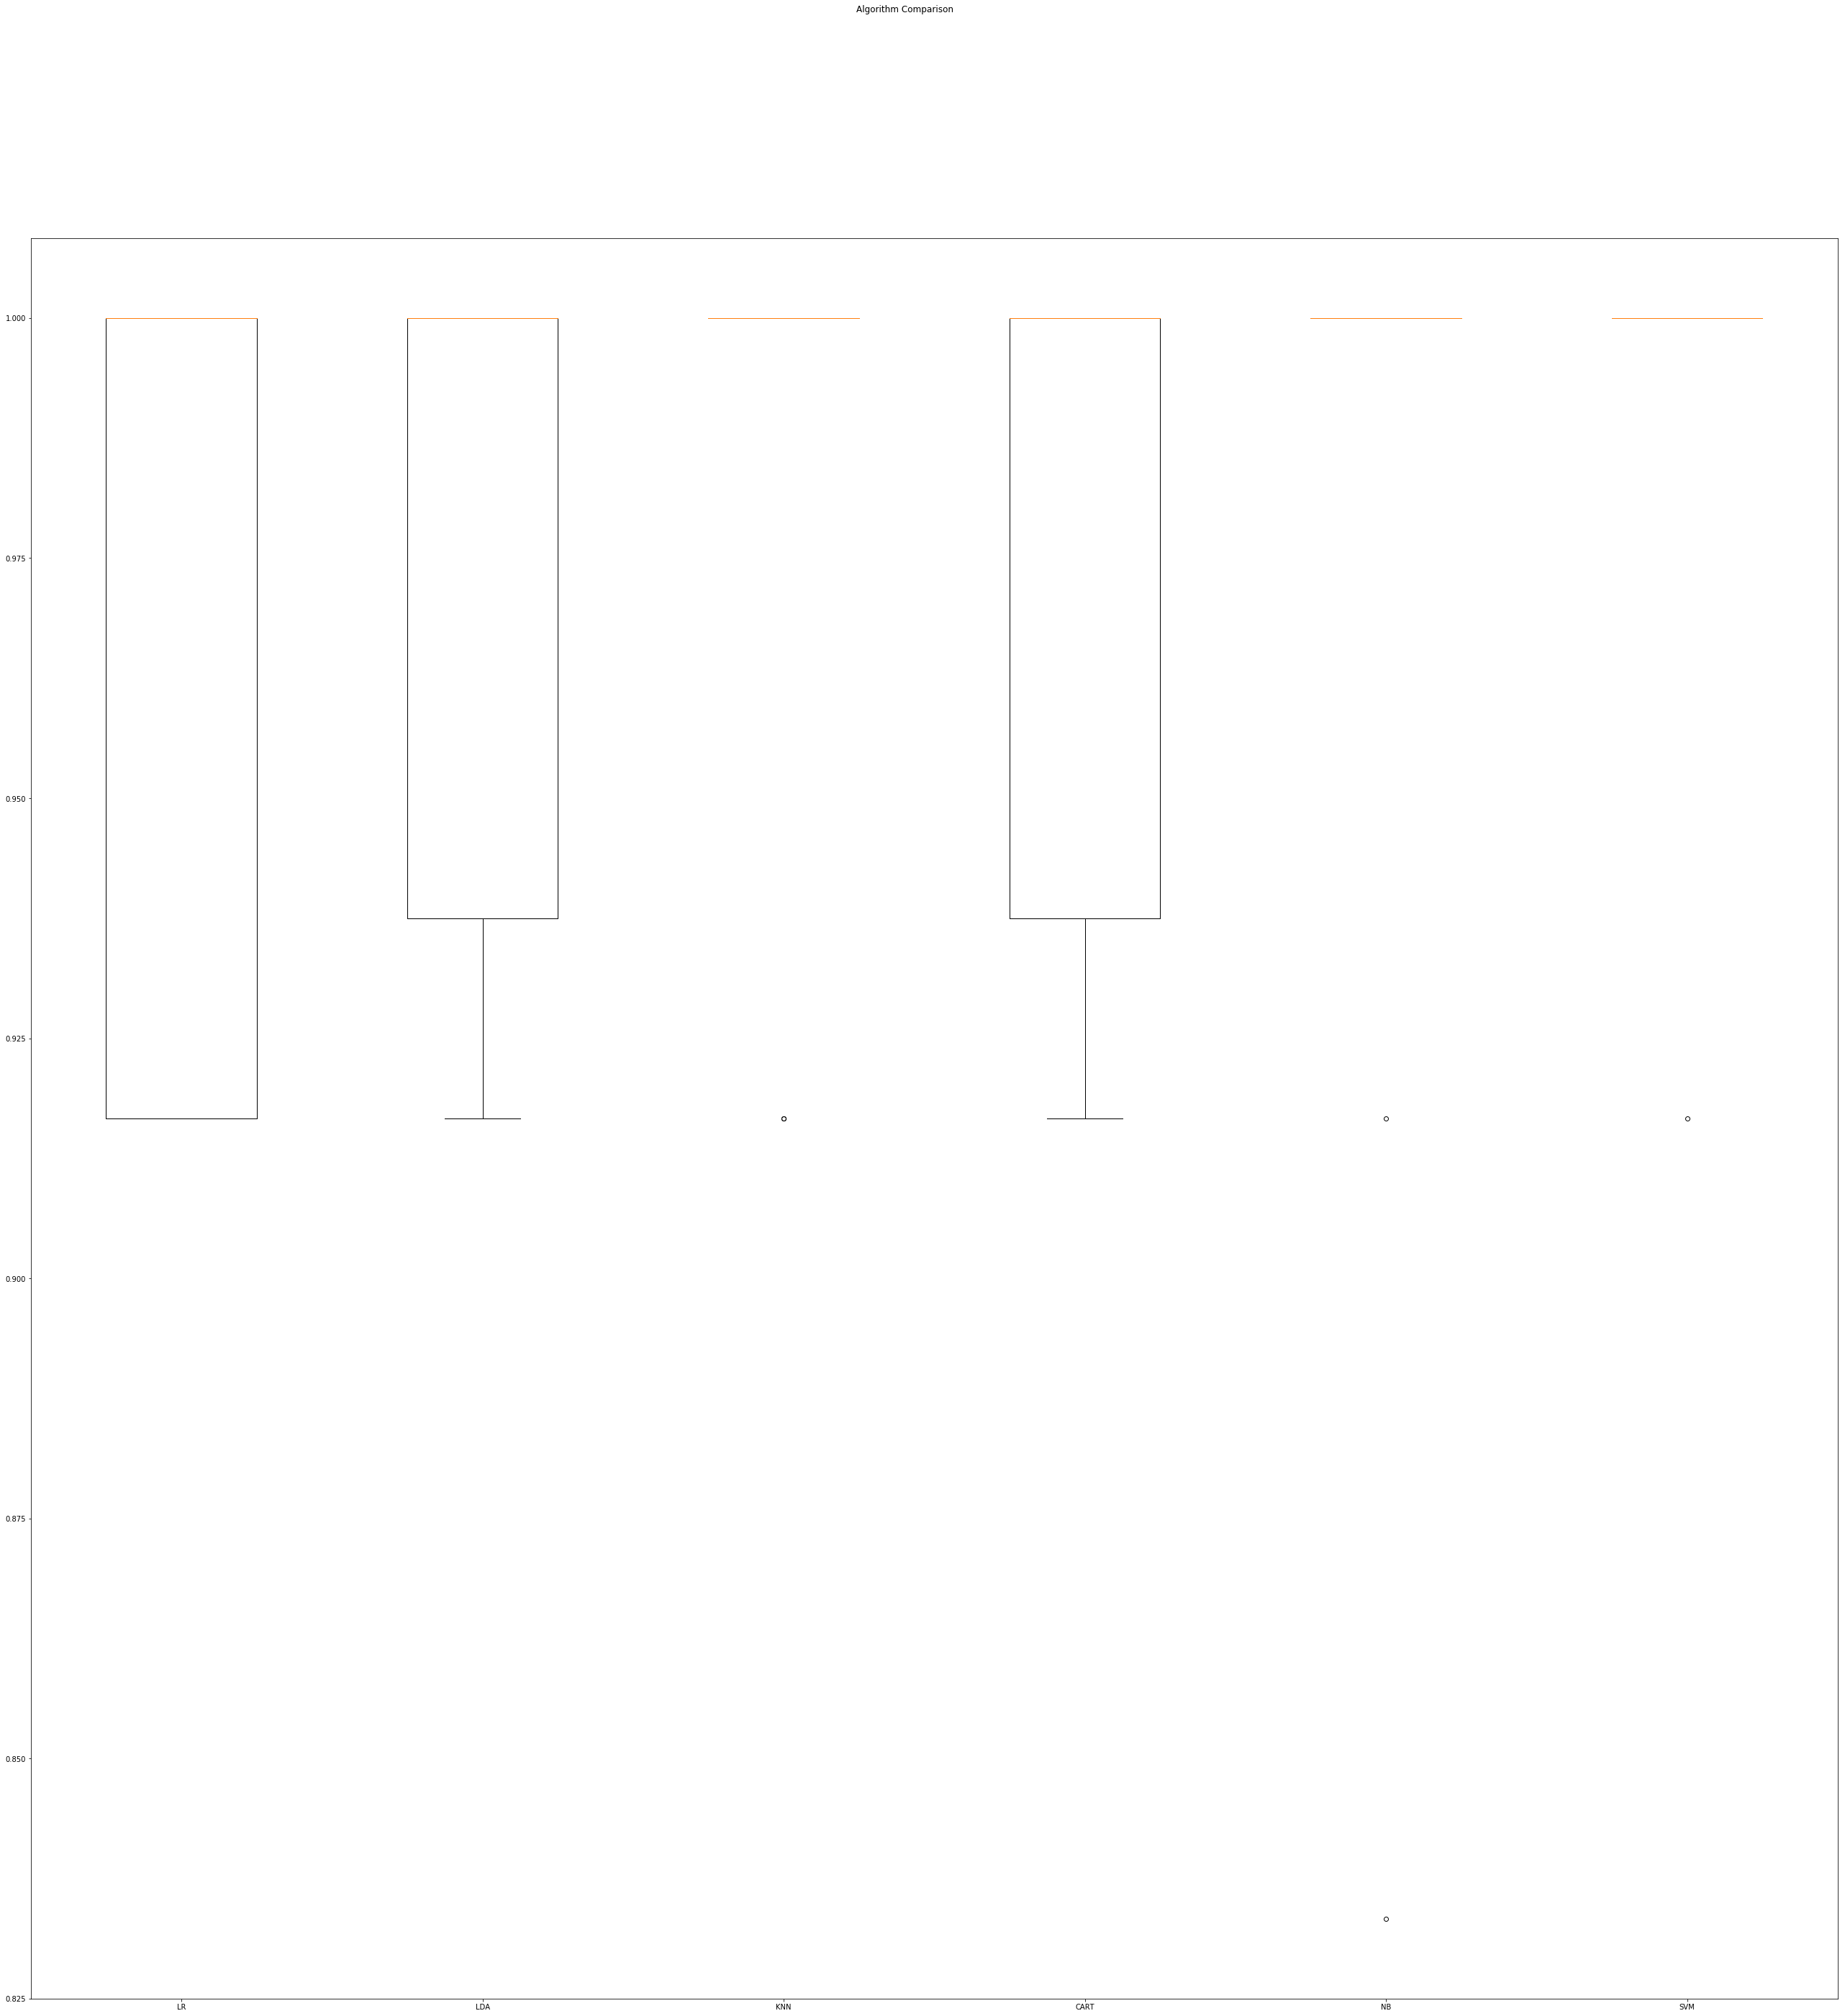

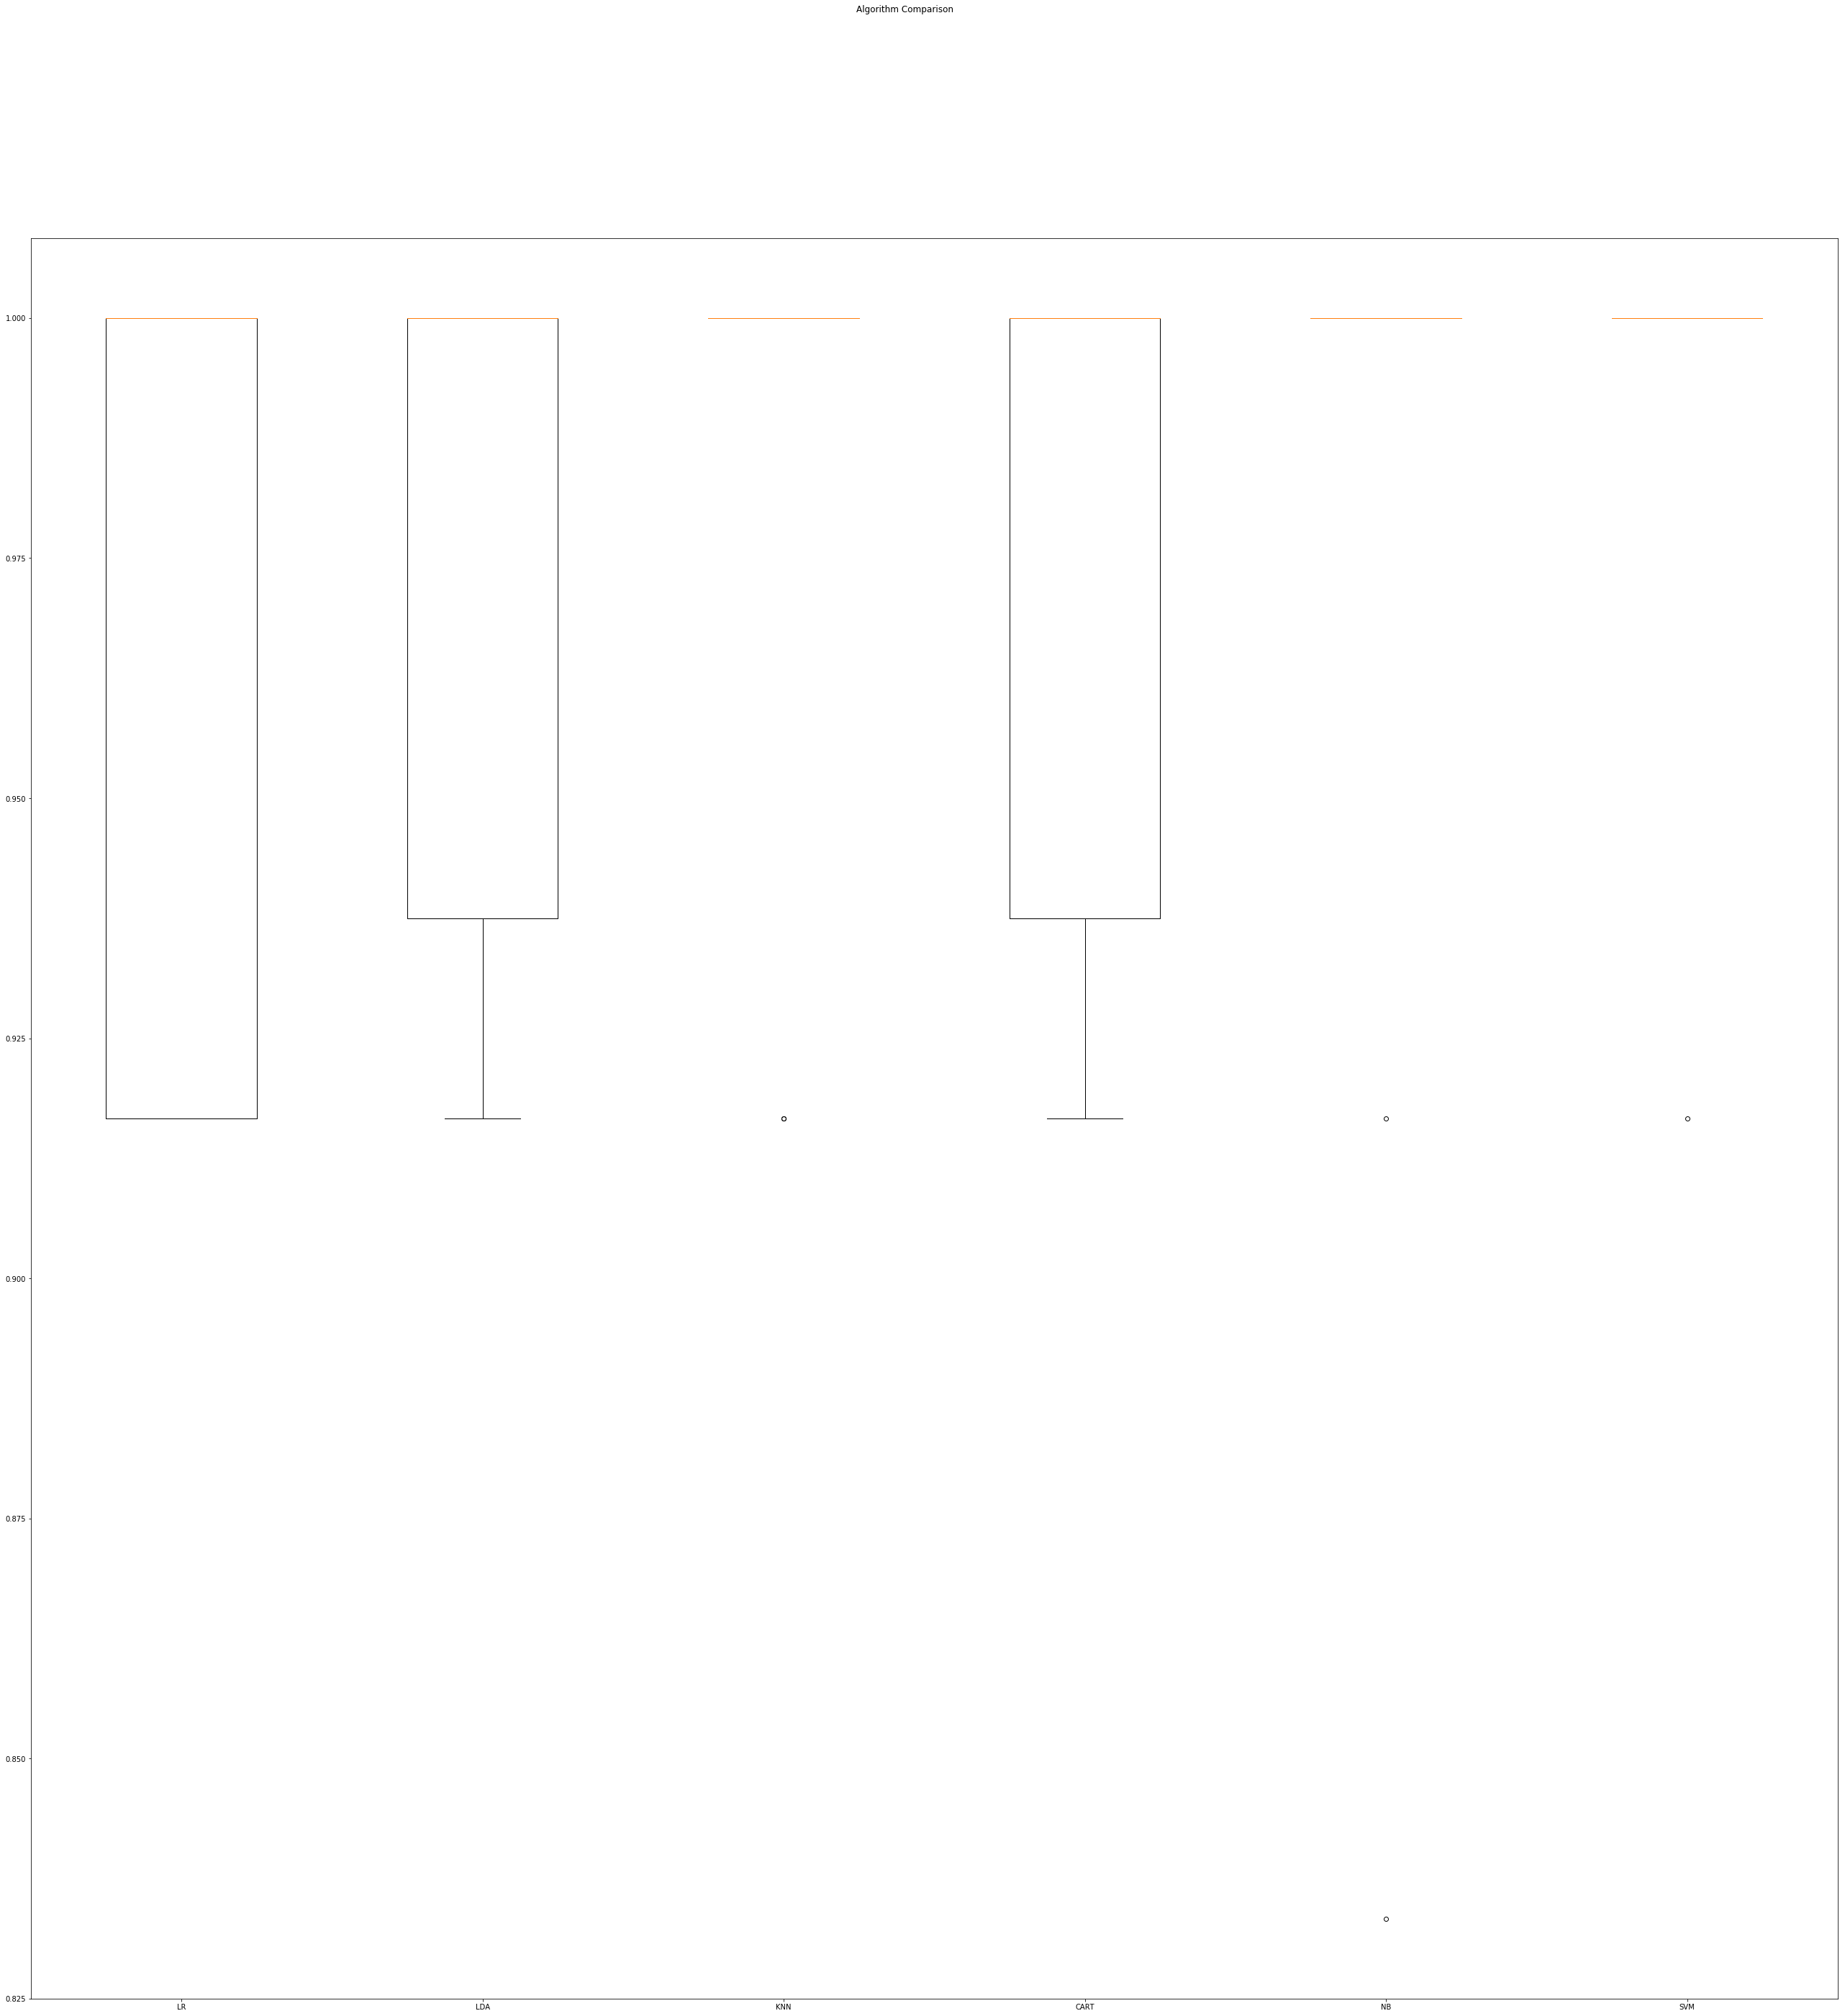

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [26]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.image as image 

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

# shape
print(dataset.shape)

# head
print(dataset.head(20))

# descriptions
print(dataset.describe())

# class distribution
print(dataset.groupby('class').size())

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# histograms
dataset.hist()
plt.show()

# scatter plot matrix
scatter_matrix(dataset)
plt.show()

# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))